In [168]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import toml

# CV2 Example
Taken from [this tutorial](https://learnopencv.com/understanding-lens-distortion/)

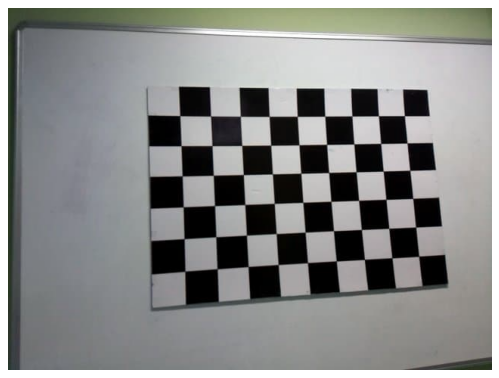

In [169]:
checker_board_image = cv2.imread("images/checkerboard.jpg")
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(checker_board_image)

In [170]:
patternSize = (9, 6)
retval, corners = cv2.findChessboardCorners(checker_board_image, patternSize)
print(type(corners[0][0][0]))
print(corners)

<class 'numpy.float32'>
[[[543.4887  329.0943 ]]

 [[507.54837 331.7395 ]]

 [[471.4346  333.85507]]

 [[434.50592 336.20285]]

 [[396.6122  337.71027]]

 [[357.24588 340.62732]]

 [[318.7152  342.3668 ]]

 [[277.5199  347.22797]]

 [[235.03368 348.6984 ]]

 [[539.50287 291.27798]]

 [[503.61072 292.79272]]

 [[467.64194 294.2903 ]]

 [[430.49478 296.00516]]

 [[392.7562  297.5426 ]]

 [[354.77185 299.9542 ]]

 [[315.20245 301.63843]]

 [[275.0513  304.06824]]

 [[233.43553 306.7868 ]]

 [[535.4161  252.99242]]

 [[500.15598 254.62874]]

 [[463.9941  255.79524]]

 [[427.04916 256.96063]]

 [[390.10632 258.31097]]

 [[352.07742 259.99353]]

 [[313.6273  260.88272]]

 [[272.5815  261.90933]]

 [[231.99458 264.38712]]

 [[531.49756 216.0742 ]]

 [[496.13287 217.30183]]

 [[460.1872  217.77948]]

 [[423.973   219.07097]]

 [[387.07135 219.75134]]

 [[349.69742 221.00099]]

 [[311.12958 221.80586]]

 [[271.6618  222.68274]]

 [[230.53444 223.57384]]

 [[527.6578  179.9309 ]]

 [[492.9623  1

In [171]:
objp = np.zeros((1, patternSize[0] * patternSize[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:patternSize[0], 0:patternSize[1]].T.reshape(-1, 2) 
print(objp)

[[[0. 0. 0.]
  [1. 0. 0.]
  [2. 0. 0.]
  [3. 0. 0.]
  [4. 0. 0.]
  [5. 0. 0.]
  [6. 0. 0.]
  [7. 0. 0.]
  [8. 0. 0.]
  [0. 1. 0.]
  [1. 1. 0.]
  [2. 1. 0.]
  [3. 1. 0.]
  [4. 1. 0.]
  [5. 1. 0.]
  [6. 1. 0.]
  [7. 1. 0.]
  [8. 1. 0.]
  [0. 2. 0.]
  [1. 2. 0.]
  [2. 2. 0.]
  [3. 2. 0.]
  [4. 2. 0.]
  [5. 2. 0.]
  [6. 2. 0.]
  [7. 2. 0.]
  [8. 2. 0.]
  [0. 3. 0.]
  [1. 3. 0.]
  [2. 3. 0.]
  [3. 3. 0.]
  [4. 3. 0.]
  [5. 3. 0.]
  [6. 3. 0.]
  [7. 3. 0.]
  [8. 3. 0.]
  [0. 4. 0.]
  [1. 4. 0.]
  [2. 4. 0.]
  [3. 4. 0.]
  [4. 4. 0.]
  [5. 4. 0.]
  [6. 4. 0.]
  [7. 4. 0.]
  [8. 4. 0.]
  [0. 5. 0.]
  [1. 5. 0.]
  [2. 5. 0.]
  [3. 5. 0.]
  [4. 5. 0.]
  [5. 5. 0.]
  [6. 5. 0.]
  [7. 5. 0.]
  [8. 5. 0.]]]


In [172]:
h,w = checker_board_image.shape[:2]
gray = cv2.cvtColor(checker_board_image,cv2.COLOR_BGR2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([objp], [corners], gray.shape[::-1], None, None)

print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

Camera matrix : 

[[647.15779136   0.         356.98475118]
 [  0.         644.5164534  224.81299291]
 [  0.           0.           1.        ]]
dist : 

[[ 5.44855856e-01 -5.51263195e+00 -5.42386595e-04  2.31457680e-02
   1.89310790e+01]]
rvecs : 

[array([[-0.39834702],
       [ 0.22336849],
       [ 3.06361002]])]
tvecs : 

[array([[ 4.8317169 ],
       [ 2.73906323],
       [17.43096351]])]


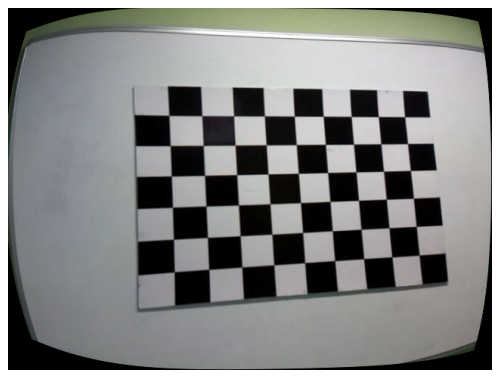

In [173]:
# Refining the camera matrix using parameters obtained by calibration
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
 
# Method 1 to undistort the image
dst = cv2.undistort(checker_board_image, mtx, dist, None, newcameramtx)
 
# Method 2 to undistort the image
mapx,mapy=cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
 
dst = cv2.remap(checker_board_image, mapx,mapy,cv2.INTER_LINEAR)
 
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(dst)

# Implementation

In [174]:
images = []

csv_path = "C:/Users/chuck/OneDrive/Desktop/Honors/solarEL/solarel/Barrel_distort/chessboard.csv.csv"
df = pd.read_csv(csv_path)
# Splitting the DataFrame based on 'image' value
grouped_df = df.groupby('image')

# Creating a dictionary of DataFrames
dataframes_dict = {group_name: group_df for group_name, group_df in grouped_df}


# Accessing individual DataFrames

points = {}
for image_name, image_df in dataframes_dict.items():
    points.update({image_name: list(zip(image_df["x"], image_df['y']))})

In [204]:
import random
dict_items = list(points.items())
random_pair = random.choice(dict_items)
image_name, _ = random_pair
print(image_name)

LRP504033180901041029_IMG_8655.JPG


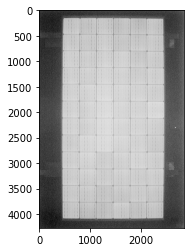

In [205]:
import cv2
image = cv2.imread(f"images/{image_name}")
image_cp = np.copy(image)
plt.imshow(image)

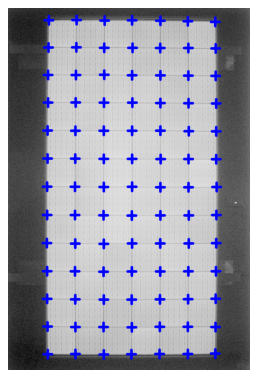

In [206]:
coords = points[str(image_name)]
for point in coords:
    image_cp = cv2.drawMarker(image_cp, point, (0, 0, 255), cv2.MARKER_CROSS, 100, 30)

cv2.imwrite("markers1.jpg", image_cp)
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(image_cp)

In [178]:
# image_path = "C:/Users/chuck/OneDrive/Desktop/Honors/M0060/M0060/LRE504055180800401088_IMG_8667.JPG"
# image = cv2.imread(image_path)
# image_cp = np.copy(image)

# for point in points:
#     image_cp = cv2.drawMarker(image_cp, point, (0,255,0), cv2.MARKER_DIAMOND, 50, 20)

# plt.figure(figsize=(8, 6), dpi=80)
# plt.axis('off')
# plt.imshow(image_cp)

In [179]:
# csv_path = "C:/Users/chuck/OneDrive/Desktop/Honors/chessboard_points.csv"
# df = pd.read_csv(csv_path)

# points = list(zip(df["x"], df['y']))
# print(points)

# image_path = "C:/Users/chuck/OneDrive/Desktop/Honors/M0060/M0060/LRE504055180800401088_IMG_8667.JPG"
# image = cv2.imread(image_path)
# image_cp = np.copy(image)

# for point in points:
#     image_cp = cv2.drawMarker(image_cp, point, (0,255,0), cv2.MARKER_DIAMOND, 50, 20)

# plt.figure(figsize=(8, 6), dpi=80)
# plt.axis('off')
# plt.imshow(image_cp)

In [180]:
def cluster(points, maxgap):

    sorted_points = sorted(points, key=lambda p: p[0])
    xs = [point[0] for point in sorted_points]

    groups = [[sorted_points[0]]]
    for i, x in enumerate(xs[1:]):
        if abs(x - groups[-1][-1][0]) <= maxgap:
            groups[-1].append(sorted_points[i+1])
        else:
            groups.append([sorted_points[i+1]])
    
    final = []
    for group in groups:
        group = sorted(group, key=lambda p: p[1])
        final.extend(group)
    return final

In [181]:
corners = []
objpoints = []

patternSize = (13, 7)
objp = np.zeros((1, patternSize[0] * patternSize[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:patternSize[0], 0:patternSize[1]].T.reshape(-1, 2) 

for p_list in points.values():
    objpoints.append(objp)
    corners2 = [[x, y] for (x, y) in p_list]
    corners3 = [cluster(corners2, 100)]
    corners3 = np.array(corners3, np.float32)
    corners.append(corners3)
# print(corners3)
print(objp)

[[[ 0.  0.  0.]
  [ 1.  0.  0.]
  [ 2.  0.  0.]
  [ 3.  0.  0.]
  [ 4.  0.  0.]
  [ 5.  0.  0.]
  [ 6.  0.  0.]
  [ 7.  0.  0.]
  [ 8.  0.  0.]
  [ 9.  0.  0.]
  [10.  0.  0.]
  [11.  0.  0.]
  [12.  0.  0.]
  [ 0.  1.  0.]
  [ 1.  1.  0.]
  [ 2.  1.  0.]
  [ 3.  1.  0.]
  [ 4.  1.  0.]
  [ 5.  1.  0.]
  [ 6.  1.  0.]
  [ 7.  1.  0.]
  [ 8.  1.  0.]
  [ 9.  1.  0.]
  [10.  1.  0.]
  [11.  1.  0.]
  [12.  1.  0.]
  [ 0.  2.  0.]
  [ 1.  2.  0.]
  [ 2.  2.  0.]
  [ 3.  2.  0.]
  [ 4.  2.  0.]
  [ 5.  2.  0.]
  [ 6.  2.  0.]
  [ 7.  2.  0.]
  [ 8.  2.  0.]
  [ 9.  2.  0.]
  [10.  2.  0.]
  [11.  2.  0.]
  [12.  2.  0.]
  [ 0.  3.  0.]
  [ 1.  3.  0.]
  [ 2.  3.  0.]
  [ 3.  3.  0.]
  [ 4.  3.  0.]
  [ 5.  3.  0.]
  [ 6.  3.  0.]
  [ 7.  3.  0.]
  [ 8.  3.  0.]
  [ 9.  3.  0.]
  [10.  3.  0.]
  [11.  3.  0.]
  [12.  3.  0.]
  [ 0.  4.  0.]
  [ 1.  4.  0.]
  [ 2.  4.  0.]
  [ 3.  4.  0.]
  [ 4.  4.  0.]
  [ 5.  4.  0.]
  [ 6.  4.  0.]
  [ 7.  4.  0.]
  [ 8.  4.  0.]
  [ 9.  4.  0.]
  [10.  

In [182]:
# patternSize = (13, 7)
# objp = np.zeros((1, patternSize[0] * patternSize[1], 3), np.float32)
# objp[0,:,:2] = np.mgrid[0:patternSize[0], 0:patternSize[1]].T.reshape(-1, 2) 
# print(objp)

In [183]:
h,w = image.shape[:2]
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, corners, gray.shape[::-1], None, None)

print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

Camera matrix : 

[[1.15888370e+04 0.00000000e+00 1.43952566e+03]
 [0.00000000e+00 1.15611809e+04 2.01715589e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[-7.45878259e-01  1.01125750e+01  5.13615613e-03 -2.37991745e-03
  -1.09957560e+02]]
rvecs : 

[array([[ 2.22602783],
       [ 2.21231053],
       [-0.00868531]]), array([[ 2.20997768],
       [ 2.19481338],
       [-0.00817097]]), array([[2.16786936],
       [2.16121487],
       [0.08178383]]), array([[-2.21421406],
       [-2.21729219],
       [-0.01529895]]), array([[2.20123201],
       [2.20641556],
       [0.01064624]]), array([[-2.20944278],
       [-2.2101384 ],
       [ 0.00983573]]), array([[ 2.21901936],
       [ 2.22747818],
       [-0.00642576]])]
tvecs : 

[array([[-3.24228712],
       [-5.68307823],
       [34.22037523]]), array([[-3.25483522],
       [-5.68410703],
       [34.26598702]]), array([[-3.2379058 ],
       [-5.61003952],
       [33.79216896]]), array([[-3.02253933],
       [-5.75109308],
  

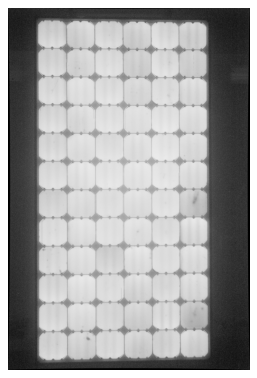

In [184]:
# Refining the camera matrix using parameters obtained by calibration
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
 
# Method 1 to undistort the image
dst = cv2.undistort(image, mtx, dist, None, newcameramtx)
 
# Method 2 to undistort the image
mapx,mapy=cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
 
dst = cv2.remap(image, mapx,mapy,cv2.INTER_LINEAR)
cv2.imwrite("images/test.jpg", dst)
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(dst)

# Write the camera settings into config file

In [188]:
with open('camera_config_new.toml', 'rb') as f:
    data = toml.load('camera_config_new.toml')

print(data)
# Modify the value of the 'title' key
data['camera']['camera_matrix'] = newcameramtx
data['camera']['mtx'] = mtx
data['camera']['dist'] = dist
data['camera']['rvecs'] = rvecs
data['camera']['tvecs'] = tvecs
print(data)

# Write the modified dictionary back to the TOML file
with open('camera_config_new.toml', 'w') as f:
    f.write(toml.dumps(data))

# Note you have to go into the toml file and remove the quotes.

{'camera': {'camera_matrix': '', 'mtx': '', 'dist': '', 'tvecs': ''}}
{'camera': {'camera_matrix': array([[1.12681855e+04, 0.00000000e+00, 1.43684626e+03],
       [0.00000000e+00, 1.12427471e+04, 2.01895312e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), 'mtx': array([[1.15888370e+04, 0.00000000e+00, 1.43952566e+03],
       [0.00000000e+00, 1.15611809e+04, 2.01715589e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), 'dist': array([[-7.45878259e-01,  1.01125750e+01,  5.13615613e-03,
        -2.37991745e-03, -1.09957560e+02]]), 'tvecs': [array([[-3.24228712],
       [-5.68307823],
       [34.22037523]]), array([[-3.25483522],
       [-5.68410703],
       [34.26598702]]), array([[-3.2379058 ],
       [-5.61003952],
       [33.79216896]]), array([[-3.02253933],
       [-5.75109308],
       [33.07085599]]), array([[-2.92528269],
       [-5.70284575],
       [34.73567196]]), array([[-3.05677094],
       [-5.66692516],
       [33.03608332]]), array([[-3.0154003

## Test it

In [192]:
# some_file.py
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'C:/Users/chuck/OneDrive/Desktop/Honors/solarEL/solarel')
from image_processor import fix_barrel_distortion, random_image
import numpy as np
import cv2
import matplotlib.pyplot as plt

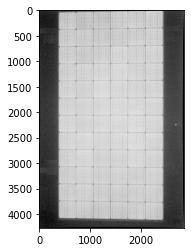

In [209]:
model_path_cells = "C:/Users/chuck/OneDrive/Desktop/Honors/models/resnet_backbone_512.hdf5"
model_path_module = "C:/Users/chuck/OneDrive/Desktop/Honors/models/resnet_PV_module_256.hdf5"
folders = ["C:/Users/chuck/OneDrive/Desktop/Honors/M0060/M0060",
            "C:/Users/chuck/OneDrive/Desktop/Honors/BT1/BT1"]
toml_path = "C:/Users/chuck/OneDrive/Desktop/Honors/solarEL/solarel/configs/camera_config_new.toml"

image = random_image(folders)
cv2.imwrite("before.jpg", image)
image = fix_barrel_distortion(image, toml_path)
cv2.imwrite("after.jpg", image)
plt.imshow(image)
plt.show()